### Import your librares

In [227]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Load your dataset

In [228]:
df = pd.read_csv('./seattle_weather.csv')
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


# TMAX Col

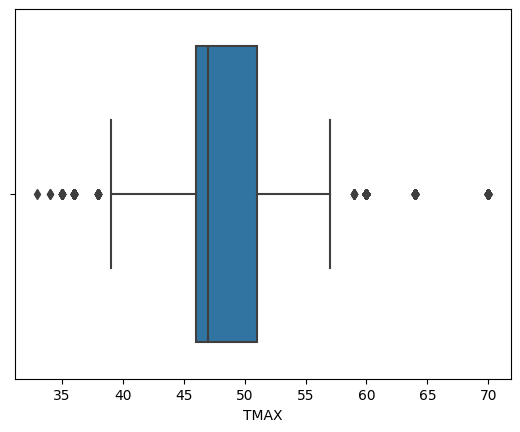

In [229]:
sns.boxplot(df['TMAX'],x=df['TMAX'])


Q1 = df['TMAX'].quantile(0.25)
Q3 = df['TMAX'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR



## Remove outliers

<Axes: xlabel='TMAX'>

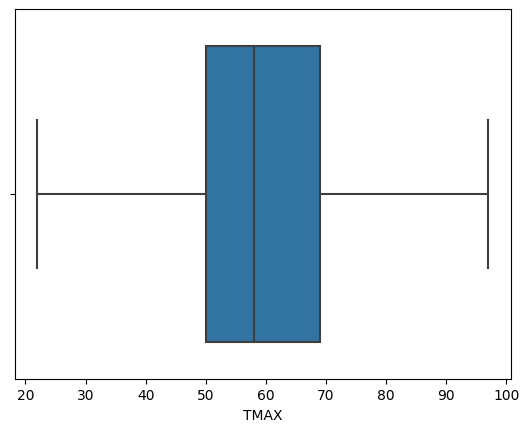

In [230]:
outliers = df[(df['TMAX'] < Q1 - 1.5 * IQR) | (df['TMAX'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

sns.boxplot(df, x="TMAX")



# TMIN Col

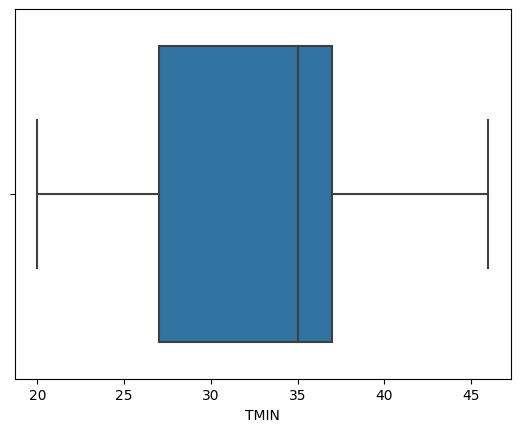

In [231]:
sns.boxplot(df['TMIN'],x=df['TMIN'])


Q1 = df['TMIN'].quantile(0.25)
Q3 = df['TMIN'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

## No outliers

# PRCP Col

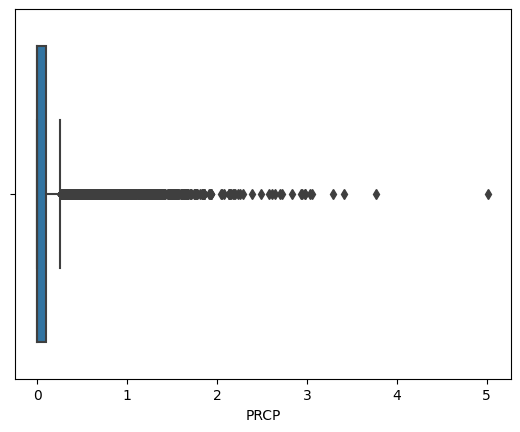

In [233]:
sns.boxplot(df['PRCP'],x=df['PRCP'])


Q1 = df['PRCP'].quantile(0.25)
Q3 = df['PRCP'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

## removing outliers

<Axes: xlabel='PRCP'>

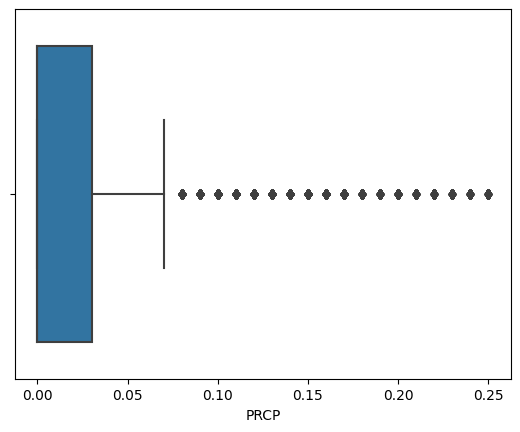

In [234]:
outliers = df[(df['PRCP'] < Q1 - 1.5 * IQR) | (df['PRCP'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

sns.boxplot(df, x="PRCP")